<a href="https://colab.research.google.com/github/afrojaakter/Pattern-Recognition/blob/main/denoiseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Clean Data')

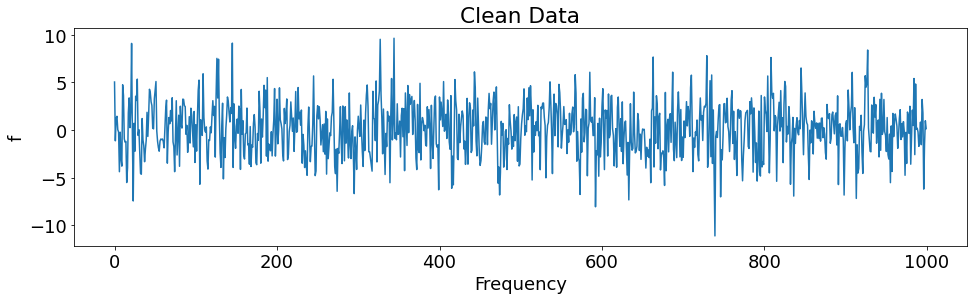

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

plt.plot(f)
plt.xlabel('Frequency')
plt.ylabel('f')
plt.title('Clean Data')

In [2]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [3]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


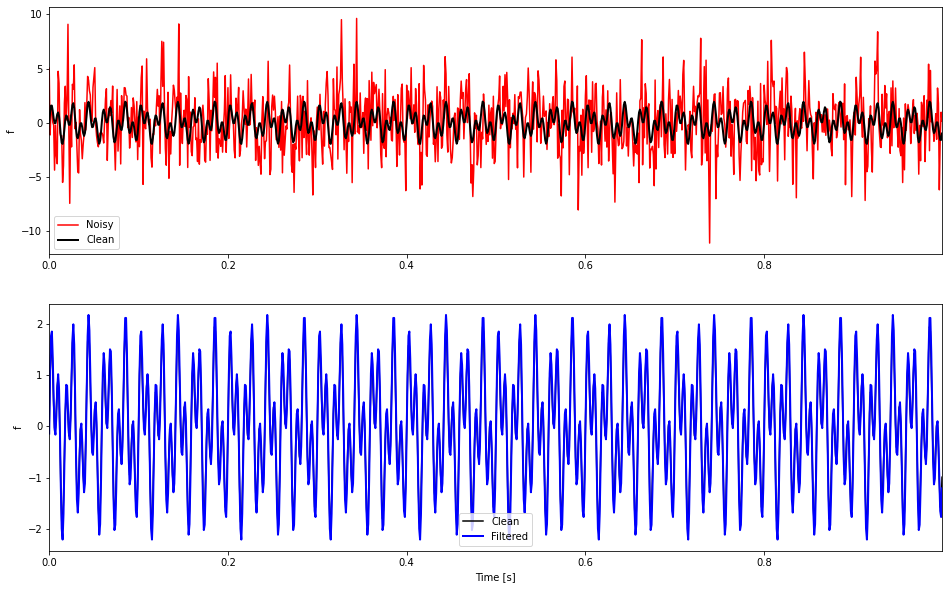

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


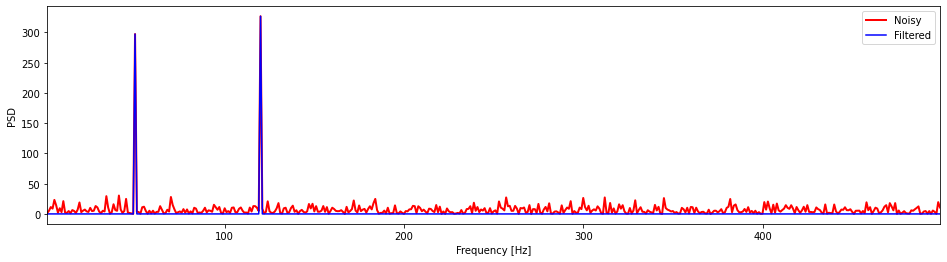

In [4]:
## Plots
plt.rcParams['figure.figsize'] = [16, 10]
fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.ylabel('f')
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',LineWidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel('Time [s]')
plt.ylabel('f')
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = [16, 4]
plt.plot(freq[L],PSD[L],color='r',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend()

plt.show()